In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.sfh as sfh
import torchvision
import gpytorch
import torch
from duste.DustAttnCalc import DustAttnCalc
import duste.DustAttnCalc as dd
import lbg_forecast.dust_priors as dp
import scipy as sc

import lbg_forecast.priors_gp_dust as gpdp

In [2]:
dust_prior = gpdp.DustPrior('./')
n, tau, tau1, ne, taue, tau1e, sfr = dust_prior.n, dust_prior.tau, dust_prior.tau1, dust_prior.ne, dust_prior.taue, dust_prior.tau1e, dust_prior.sfr

Loading Models
Loading Complete


array([0.67793306, 0.67278977, 0.65470393, 0.64795436, 0.63766949,
       0.62558258, 0.61350539, 0.60044998, 0.59054813, 0.6048742 ,
       0.68138775, 0.82362403, 0.99244077, 1.15175716])

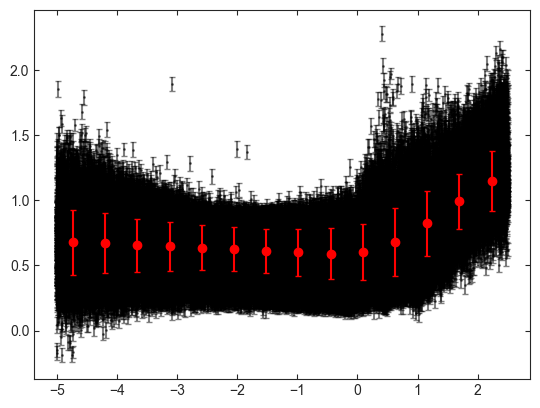

In [ ]:
plt.errorbar(sfr, tau, taue, fmt='ko', ms=1, capsize=2, alpha=0.5, zorder=-1)
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(sfr, tau, -5, 2.5, 15)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)

35.2899888426525
24.952593221961415
16.174569583931223
9.259406984503928
4.464018031802842
1.9166196415935945
1.4043574874560059
1.3620413307378443
1.320015459911285
1.2781550780655155
1.2363500123030364
1.194499111380987
1.1525184150765568
1.1103535391492465
1.0679855701873213
1.0254281486270616
0.982719988539821
0.9399168990106533
0.8970849299053504
0.8542948609212797
0.8116179469139501
0.7691229249665712
0.7268743821041379
0.6849325461387135
0.643354383835517
0.6021956308867024
0.5615131558644414
0.521366997213401
0.48182154806566857
0.4429456216754814
0.4048113783300749
0.3674922399370259
0.33105995094718704
0.29558091183794627
0.2611118743587817
0.2276950909505228
0.19535307816312156
0.1640832917112087
0.13385320730602485
0.10459652149399479
0.07621136747159629
0.048561498027521965
0.021481238774248363
-0.005215389700326518
-0.03172163240880128
-0.05822210625872531
-0.08487591875259391
-0.1118012233779051
-0.1390637118603739
-0.16667102650727592
-0.19457406608874822
-0.22267493673

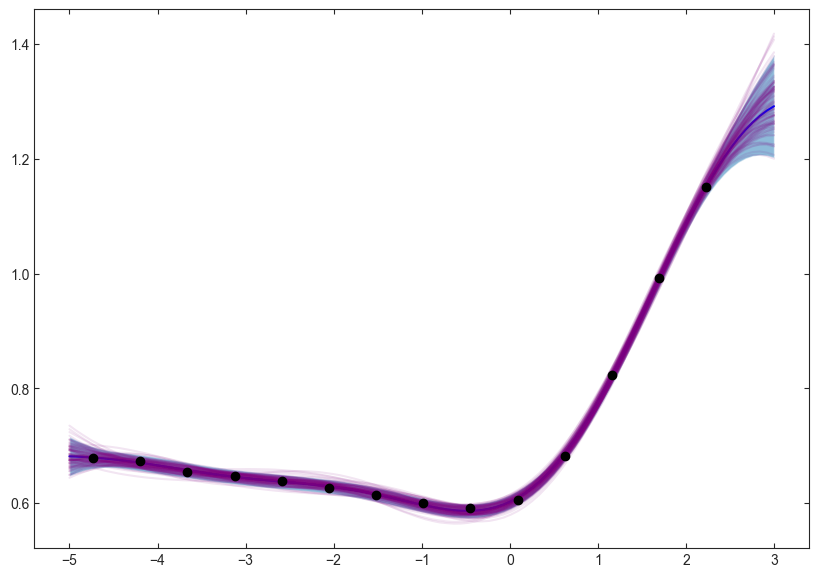

In [14]:
train_sfrs, train_dust2, train_dust2_errs = torch.from_numpy(bin_centers_de), torch.from_numpy(bin_means_de), torch.from_numpy(bin_std_de)
test_sfrs = torch.linspace(-5, 3, 100)
trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_sfrs, train_dust2, [1.0, 15.0], [-100, 100], lr=0.1, training_iter=1000)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, test_sfrs)
gpdp.gp_plot_confidence_obs(f_preds_mu, test_sfrs, train_sfrs, train_dust2, train_dust2_errs*0, labelx="", labely="", alpha=0.5)

for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')


with torch.no_grad():
    for i in range(100):
        plt.plot(test_sfrs, f_preds_mu.sample().numpy(), c='purple', alpha=0.1)

In [15]:
torch.save(trained_model.state_dict(), 'gp_models/dust2nag.pth')

array([-0.09369735, -0.04447477, -0.07659344, -0.13515984, -0.16748445,
       -0.19204375, -0.21329842, -0.22345207, -0.22485181, -0.1960331 ,
       -0.16837901, -0.13647241, -0.11001571, -0.07737146, -0.04093667,
       -0.03570926,  0.00581358, -0.00937815, -0.01342045])

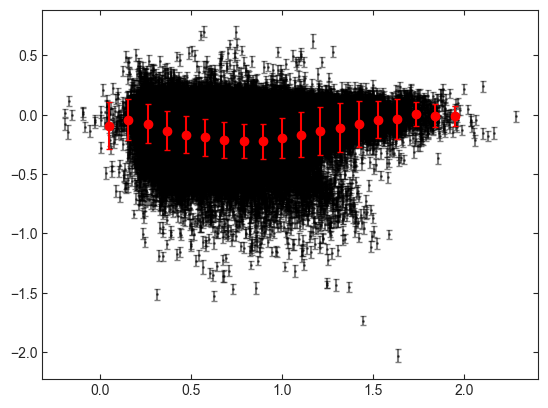

In [17]:
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(tau, n, 0, 2, 20)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)
plt.errorbar(tau, n, ne, fmt='ko', ms=1, capsize=2, alpha=0.5, zorder=-1)
bin_means_de

450.7336198832419
416.1336704014988
381.3296014724061
346.5463622626777
312.02987627524277
278.04477485172833
244.87113110609383
212.8000877703991
182.1282883333658
153.15104492670037
126.15421294779425
101.40479807702036
79.14040567384968
59.55776755065875
42.800759289567
28.948560408578427
18.004903815026633
9.889677219349323
4.434404143569535
1.3832267987279454
0.40079006038767734
0.3531046853429737
0.30569328246605876
0.25834171421425656
0.21110071180162085
0.1640258842773684
0.11717757382285106
0.07062083471080198
0.02442550311803653
-0.021333669725978454
-0.06657684614548137
-0.11121891716614553
-0.15516933037524655
-0.19833195948244353
-0.24060504865204718
-0.281881269881267
-0.3220479378403522
-0.3609874333824091
-0.3985778939044209
-0.4346942351529906
-0.4692095737882895
-0.5019971214073812
-0.5329326165157561
-0.5618973481564967
-0.5887817999375901
-0.6134899020371241
-0.6359438176988108
-0.6560891075767421
-0.673900011367422
-0.6893844688977713
-0.7025883884189029
-0.7135985

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


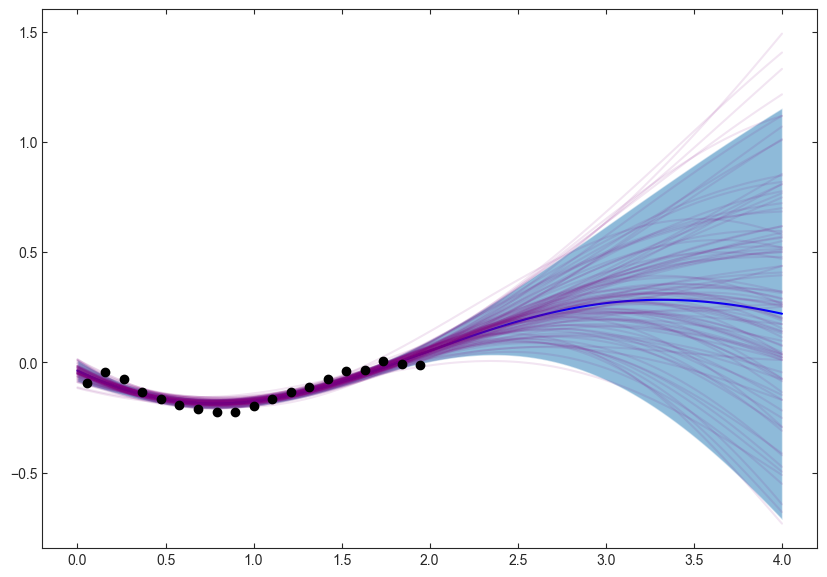

In [18]:
train_dust2, train_dust_index, train_dust_index_errs = torch.from_numpy(bin_centers_de), torch.from_numpy(bin_means_de), torch.from_numpy(bin_std_de)

test_dust2 = torch.linspace(0, 4, 100)
#train_dust2, train_dust_index, train_dust_index_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, x, y, yerr)

trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_dust2, train_dust_index, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=1000)
f_preds = gpdp.gp_evaluate_model(trained_model, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust_index, train_dust_index_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

In [19]:
torch.save(trained_model.state_dict(), 'gp_models/dust_index_nag.pth')

array([0.09125128, 0.1753068 , 0.25543903, 0.36402932, 0.47026888,
       0.57947105, 0.68762774, 0.79583125, 0.90733673, 1.04003975,
       1.1694277 , 1.31914916, 1.4736172 , 1.6289856 , 1.79026021,
       1.95146785, 2.07256227, 2.14193161, 2.1717486 ])

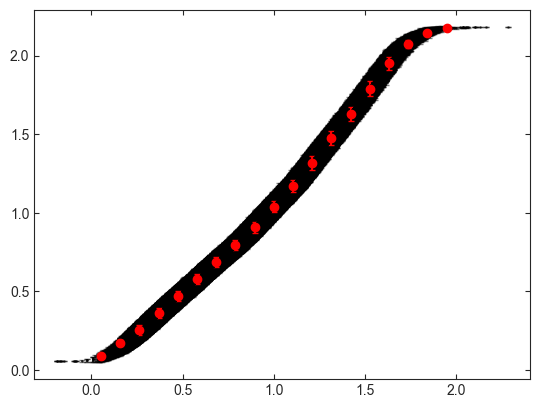

In [22]:
plt.errorbar(tau, tau1, tau1e, fmt='ko', ms=1, capsize=2, alpha=0.5)
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(tau, tau1, 0, 2.0, 20)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)
bin_means_de

450.82217213730587
416.22858545544796
381.4309584178841
346.65422980634287
312.14429223632635
278.16575843655806
244.99870540645813
212.93428797322616
182.2691600409442
153.2986391250317
126.30857978530378
101.56597977951897
79.30842854689126
59.73263310185236
42.98243471100877
29.1369689190038
18.19991566217513
10.091102463239071
4.641988612712479
1.5966527102389874
0.6196825647804768
0.57765561448618
0.5356659369779666
0.49348781457025853
0.4511660847391174
0.4087456005154695
0.36627041605516264
0.32378337823426323
0.28132602341093893
0.23893869604934284
0.19666082132521673
0.15453127736352537
0.11258882448221218
0.07087255878486431
0.029422365714279516
-0.01172064418593533
-0.05251372996929086
-0.0929121544703398
-0.13286886466859837
-0.1723342237353567
-0.21125580001948466
-0.249578218711815
-0.2872430829102723
-0.3241889720689159
-0.3603515271291081
-0.39566363280306976
-0.4300557083137038
-0.4634561182235354
-0.4957917146454799
-0.5269885209827647
-0.5569725652512444
-0.585670867

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


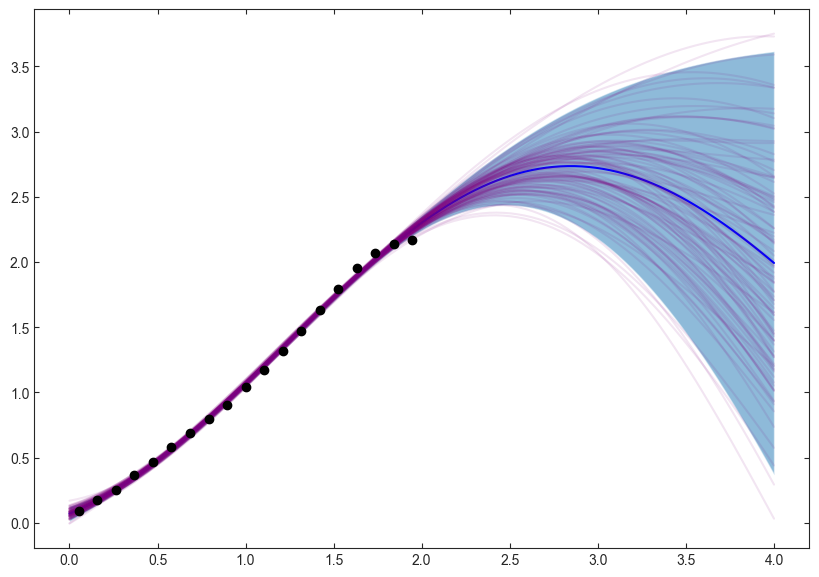

In [23]:
test_dust2 = torch.linspace(0, 4, 100)
train_dust2, train_dust1, train_dust1_errs = torch.from_numpy(bin_centers_de), torch.from_numpy(bin_means_de), torch.from_numpy(bin_std_de)

trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_dust2, train_dust1, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=1000)
f_preds = gpdp.gp_evaluate_model(trained_model, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust1, train_dust1_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

In [24]:
torch.save(trained_model.state_dict(), 'gp_models/dust1nag.pth')